In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# set max dispaly rows
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)

# Load data

In [45]:
CIL_df = pd.read_csv(
    "results/class_incremental-trials=10-batch_size=128-window_size=50-num_voters=8-width=64-CAI-experiments-feb16-vizdata-test-feb16.csv"
)
DIL_df = pd.read_csv(
    "results/domain_incremental-trials=10-batch_size=128-window_size=400-num_voters=8-width=64-CAI-experiments-feb16-vizdata-test-feb16.csv"
)
MV_CIL_df = pd.read_csv(
    "results/many_v_class_incremental-trials=10-batch_size=128-window_size=50-num_voters=30-width=16-CAI-experiments-feb16-vizdata-test-feb16.csv"
)

# drop all the rows where the ensemble column contains StudentExpert
CIL_df = CIL_df[~CIL_df["ensemble"].str.contains("StudentExpert")]
DIL_df = DIL_df[~DIL_df["ensemble"].str.contains("StudentExpert")]
MV_CIL_df = MV_CIL_df[~MV_CIL_df["ensemble"].str.contains("StudentExpert")]

# Class Incremental

In [46]:
CIL_df.head()

,ensemble,avg_test_acc,context_1_test_acc,context_2_test_acc,context_3_test_acc,context_4_test_acc,context_5_test_acc
0,GEM,"(0.9578132261072854, 0.0021934159923171336)","(0.9839243498817968, 0.002257652271643185)","(0.9519098922624878, 0.0064627665764245236)","(0.9498399146211314, 0.007599139004874232)","(0.9579053373615307, 0.0034827022086184535)","(0.9454866364094807, 0.0032794131090043716)"
9,Replay,"(0.7294576518307879, 0.017563709621468006)","(0.8084633569739952, 0.029958940729758625)","(0.6095984329089129, 0.047663629936058556)","(0.5145144076840982, 0.0630048002089837)","(0.7419939577039274, 0.04734695805574458)","(0.9727181038830055, 0.0035260405660944615)"
14,GDumb,"(0.5427103897313239, 0.05313375230734791)","(0.8281796690307329, 0.10734968185384478)","(0.5309990205680706, 0.11895039492714793)","(0.35314834578441834, 0.17969361732953743)","(0.5236656596173213, 0.19760248248662032)","(0.4775592536560766, 0.2174570582903987)"
15,MIR,"(0.5241904067240051, 0.09996635148703031)","(0.6000472813238771, 0.2101133783037135)","(0.5733594515181195, 0.14614666977370191)","(0.6448239060832444, 0.22051817593629952)","(0.0011581067472306143, 0.0020888689338057946)","(0.8015632879475543, 0.1499119401845784)"
16,probabilistic_better-balanced_accuracy_score-n...,"(0.43267603153269735, 0.03380444652551209)","(0.7318337082862854, 0.14159046533012373)","(0.02447889986215159, 0.050984978085388634)","(0.932820122241974, 0.043417024359806426)","(0.358805338665843, 0.17494562086721105)","(0.11544208860723301, 0.17099996271556328)"


In [47]:
CI_one_guru_df = CIL_df[CIL_df["ensemble"].str.contains("num_gurus-1")]
CI_two_guru_df = CIL_df[CIL_df["ensemble"].str.contains("num_gurus-2")]
CI_three_guru_df = CIL_df[CIL_df["ensemble"].str.contains("num_gurus-3")]
CI_four_guru_df = CIL_df[CIL_df["ensemble"].str.contains("num_gurus-4")]

In [48]:
# avg_test_acc is a tuple (acc, std)
CI_one_guru_mean = CI_one_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
CI_one_guru_std_values = (
    CI_one_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
# calculate the pooled standard deviation
CI_one_guru_std = np.sqrt(
    np.sum(CI_one_guru_std_values**2) / len(CI_one_guru_std_values)
)


CI_two_guru_mean = CI_two_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
CI_two_guru_std_values = (
    CI_two_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
# calculate the pooled standard deviation
CI_two_guru_std = np.sqrt(
    np.sum(CI_two_guru_std_values**2) / len(CI_two_guru_std_values)
)


CI_three_guru_mean = CI_three_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
CI_three_guru_std_values = (
    CI_three_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
# calculate the pooled standard deviation
CI_three_guru_std = np.sqrt(
    np.sum(CI_three_guru_std_values**2) / len(CI_three_guru_std_values)
)


CI_four_guru_mean = CI_four_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
CI_four_guru_std_values = (
    CI_four_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
# calculate the pooled standard deviation
CI_four_guru_std = np.sqrt(
    np.sum(CI_four_guru_std_values**2) / len(CI_four_guru_std_values)
)


# multiply all the values by 100
CI_one_guru_mean = CI_one_guru_mean * 100
CI_one_guru_std = CI_one_guru_std * 100
CI_two_guru_mean = CI_two_guru_mean * 100
CI_two_guru_std = CI_two_guru_std * 100
CI_three_guru_mean = CI_three_guru_mean * 100
CI_three_guru_std = CI_three_guru_std * 100
CI_four_guru_mean = CI_four_guru_mean * 100
CI_four_guru_std = CI_four_guru_std * 100

print(
    f"CI_one_guru_mean: {CI_one_guru_mean}, CI_one_guru_pooled_std: {CI_one_guru_std}"
)
print(
    f"CI_two_guru_mean: {CI_two_guru_mean}, CI_two_guru_pooled_std: {CI_two_guru_std}"
)
print(
    f"CI_three_guru_mean: {CI_three_guru_mean}, CI_three_guru_pooled_std: {CI_three_guru_std}"
)
print(
    f"CI_four_guru_mean: {CI_four_guru_mean}, CI_four_guru_pooled_std: {CI_four_guru_std}"
)

CI_one_guru_mean: 37.6654371946815, CI_one_guru_pooled_std: 6.7047588160851825
CI_two_guru_mean: 31.342479750395253, CI_two_guru_pooled_std: 4.329118858661913
CI_three_guru_mean: 29.87845428972505, CI_three_guru_pooled_std: 2.5701585519728063
CI_four_guru_mean: 30.64916583802551, CI_four_guru_pooled_std: 2.6152176621782117


# Many Voter Class Incremental

In [49]:
MV_CIL_df.head()

,ensemble,avg_test_acc,context_1_test_acc,context_2_test_acc,context_3_test_acc,context_4_test_acc,context_5_test_acc
0,max_diversity-accuracy_score-num_gurus-7,"(0.42685280867182096, 0.046591724857778544)","(0.6298733818180421, 0.21322122350562783)","(0.09759781630709767, 0.2314161489931543)","(0.00010416666666666666, 0.00020833333333333332)","(0.898323567584157, 0.0878625756163807)","(0.5083651109831407, 0.2525438559963803)"
1,probabilistic_weighted-accuracy_score-num_gurus-7,"(0.41971254492886184, 0.0684984405783983)","(0.7625205773476731, 0.2642577162003916)","(0.022916399873793125, 0.06745186859265988)","(0.00026041666666666666, 0.0007812499999999998)","(0.8032655656337738, 0.17924192592119692)","(0.5095997651224025, 0.22668790077780585)"
2,random_better-accuracy_score-num_gurus-5,"(0.416369122616344, 0.07270632164832862)","(0.8841541377937092, 0.07025500116672306)","(0.10730660858098418, 0.20716754154190262)","(0.0715218497812748, 0.21006342393610444)","(0.7274280896410346, 0.24014412126233356)","(0.29143492728471754, 0.18872776528179425)"
3,probabilistic_better-accuracy_score-num_gurus-7,"(0.40519822597284527, 0.03499663341029803)","(0.8238380702102885, 0.09120869650725318)","(0.04027119623497129, 0.0890982365810496)","(0.0, 0.0)","(0.9152595292776823, 0.060655886471500255)","(0.24662233414128423, 0.17290631658093217)"
4,probabilistic_better-accuracy_score-num_gurus-5,"(0.39338250183272083, 0.09291525386720795)","(0.8354271839646732, 0.07961377260173243)","(0.06588034722954035, 0.15173229462625515)","(0.06535696138938268, 0.1062283322124734)","(0.7804036461748183, 0.3236834442629436)","(0.2198443704051897, 0.17653178596394184)"


In [50]:
MV_CI_one_guru_df = MV_CIL_df[
    MV_CIL_df["ensemble"].str.contains("num_gurus-1")
    & ~MV_CIL_df["ensemble"].str.contains("num_gurus-11")
]
MV_CI_three_guru_df = MV_CIL_df[MV_CIL_df["ensemble"].str.contains("num_gurus-3")]
MV_CI_five_guru_df = MV_CIL_df[MV_CIL_df["ensemble"].str.contains("num_gurus-5")]
MV_CI_seven_guru_df = MV_CIL_df[MV_CIL_df["ensemble"].str.contains("num_gurus-7")]
MV_CI_nine_guru_df = MV_CIL_df[MV_CIL_df["ensemble"].str.contains("num_gurus-9")]
MV_CI_eleven_guru_df = MV_CIL_df[MV_CIL_df["ensemble"].str.contains("num_gurus-11")]

In [51]:
# avg_test_acc is a tuple (acc, std)
MV_CI_one_guru_mean = (
    MV_CI_one_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
)
MV_CI_one_guru_std_values = (
    MV_CI_one_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
MV_CI_one_guru_std = np.sqrt(
    np.sum(MV_CI_one_guru_std_values**2) / len(MV_CI_one_guru_std_values)
)

MV_CI_three_guru_mean = (
    MV_CI_three_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
)
MV_CI_three_guru_std_values = (
    MV_CI_three_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
MV_CI_three_guru_std = np.sqrt(
    np.sum(MV_CI_three_guru_std_values**2) / len(MV_CI_three_guru_std_values)
)

MV_CI_five_guru_mean = (
    MV_CI_five_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
)
MV_CI_five_guru_std_values = (
    MV_CI_five_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
MV_CI_five_guru_std = np.sqrt(
    np.sum(MV_CI_five_guru_std_values**2) / len(MV_CI_five_guru_std_values)
)

MV_CI_seven_guru_mean = (
    MV_CI_seven_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
)
MV_CI_seven_guru_std_values = (
    MV_CI_seven_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
MV_CI_seven_guru_std = np.sqrt(
    np.sum(MV_CI_seven_guru_std_values**2) / len(MV_CI_seven_guru_std_values)
)

MV_CI_nine_guru_mean = (
    MV_CI_nine_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
)
MV_CI_nine_guru_std_values = (
    MV_CI_nine_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
MV_CI_nine_guru_std = np.sqrt(
    np.sum(MV_CI_nine_guru_std_values**2) / len(MV_CI_nine_guru_std_values)
)

MV_CI_eleven_guru_mean = (
    MV_CI_eleven_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
)
MV_CI_eleven_guru_std_values = (
    MV_CI_eleven_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
MV_CI_eleven_guru_std = np.sqrt(
    np.sum(MV_CI_eleven_guru_std_values**2) / len(MV_CI_eleven_guru_std_values)
)

# multiply all the values by 100
MV_CI_one_guru_mean = MV_CI_one_guru_mean * 100
MV_CI_one_guru_std = MV_CI_one_guru_std * 100
MV_CI_three_guru_mean = MV_CI_three_guru_mean * 100
MV_CI_three_guru_std = MV_CI_three_guru_std * 100
MV_CI_five_guru_mean = MV_CI_five_guru_mean * 100
MV_CI_five_guru_std = MV_CI_five_guru_std * 100
MV_CI_seven_guru_mean = MV_CI_seven_guru_mean * 100
MV_CI_seven_guru_std = MV_CI_seven_guru_std * 100
MV_CI_nine_guru_mean = MV_CI_nine_guru_mean * 100
MV_CI_nine_guru_std = MV_CI_nine_guru_std * 100
MV_CI_eleven_guru_mean = MV_CI_eleven_guru_mean * 100
MV_CI_eleven_guru_std = MV_CI_eleven_guru_std * 100

print(
    f"MV_CI_one_guru_mean: {MV_CI_one_guru_mean}, MV_CI_one_guru_pooled_std: {MV_CI_one_guru_std}"
)
print(
    f"MV_CI_three_guru_mean: {MV_CI_three_guru_mean}, MV_CI_three_guru_pooled_std: {MV_CI_three_guru_std}"
)
print(
    f"MV_CI_five_guru_mean: {MV_CI_five_guru_mean}, MV_CI_five_guru_pooled_std: {MV_CI_five_guru_std}"
)
print(
    f"MV_CI_seven_guru_mean: {MV_CI_seven_guru_mean}, MV_CI_seven_guru_pooled_std: {MV_CI_seven_guru_std}"
)
print(
    f"MV_CI_nine_guru_mean: {MV_CI_nine_guru_mean}, MV_CI_nine_guru_pooled_std: {MV_CI_nine_guru_std}"
)
print(
    f"MV_CI_eleven_guru_mean: {MV_CI_eleven_guru_mean}, MV_CI_eleven_guru_pooled_std: {MV_CI_eleven_guru_std}"
)

MV_CI_one_guru_mean: 25.495092432555634, MV_CI_one_guru_pooled_std: 4.997596539705955
MV_CI_three_guru_mean: 31.413081427496937, MV_CI_three_guru_pooled_std: 8.443819611601878
MV_CI_five_guru_mean: 38.695998067640716, MV_CI_five_guru_pooled_std: 7.784508842370974
MV_CI_seven_guru_mean: 40.48124648925173, MV_CI_seven_guru_pooled_std: 5.651799131838603
MV_CI_nine_guru_mean: 32.40328583468149, MV_CI_nine_guru_pooled_std: 6.050830643094258
MV_CI_eleven_guru_mean: 27.736602583143394, MV_CI_eleven_guru_pooled_std: 3.3700700320735297


# Domain Incremental

In [52]:
DIL_df.head()

,ensemble,avg_test_acc,context_1_test_acc,context_2_test_acc,context_3_test_acc,context_4_test_acc,context_5_test_acc
0,GEM,"(0.9541380000000002, 0.006026212409133942)","(0.9465999999999999, 0.014403888363910615)","(0.9492900000000001, 0.015020016644464817)","(0.94718, 0.009012302702417386)","(0.9571099999999999, 0.008097586060055199)","(0.97051, 0.0021449708622729583)"
17,Replay,"(0.752452, 0.08728303120309236)","(0.6486000000000001, 0.16409669100868549)","(0.7124800000000001, 0.21334838082347848)","(0.64595, 0.16537833141013367)","(0.7839700000000001, 0.11792923344107682)","(0.97126, 0.0036233134007424847)"
18,random_better-f1_score-num_gurus-2,"(0.7478243670886077, 0.07240071760023518)","(0.7391613924050633, 0.19461712858167654)","(0.6450652689873418, 0.2502843044184579)","(0.6559434335443036, 0.18216224993942232)","(0.850751582278481, 0.09947315433708549)","(0.848200158227848, 0.08490064738899215)"
19,random_better-balanced_accuracy_score-num_gurus-2,"(0.7422013449367089, 0.07255838454829697)","(0.7423655063291139, 0.20376362291990846)","(0.623615506329114, 0.25117756698703575)","(0.6378856803797468, 0.190268113807322)","(0.8739814082278482, 0.0694484269836717)","(0.8331586234177216, 0.09549338057681377)"
20,max_diversity-balanced_accuracy_score-num_gurus-2,"(0.7409177215189873, 0.05936697395344316)","(0.7129054588607595, 0.1911800366886877)","(0.6294106012658228, 0.23475119940646055)","(0.6552808544303798, 0.1715137187770978)","(0.8339102056962027, 0.09515570126078075)","(0.8730814873417723, 0.055329928569975616)"


In [53]:
DI_one_guru_df = DIL_df[DIL_df["ensemble"].str.contains("num_gurus-1")]
DI_two_guru_df = DIL_df[DIL_df["ensemble"].str.contains("num_gurus-2")]
DI_three_guru_df = DIL_df[DIL_df["ensemble"].str.contains("num_gurus-3")]
DI_four_guru_df = DIL_df[DIL_df["ensemble"].str.contains("num_gurus-4")]

In [54]:
# avg_test_acc is a tuple (acc, std)
DI_one_guru_mean = DI_one_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
DI_one_guru_std_values = (
    DI_one_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
# calculate the pooled standard deviation
DI_one_guru_std = np.sqrt(
    np.sum(DI_one_guru_std_values**2) / len(DI_one_guru_std_values)
)

DI_two_guru_mean = DI_two_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
DI_two_guru_std_values = (
    DI_two_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
# calculate the pooled standard deviation
DI_two_guru_std = np.sqrt(
    np.sum(DI_two_guru_std_values**2) / len(DI_two_guru_std_values)
)

DI_three_guru_mean = DI_three_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
DI_three_guru_std_values = (
    DI_three_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
# calculate the pooled standard deviation
DI_three_guru_std = np.sqrt(
    np.sum(DI_three_guru_std_values**2) / len(DI_three_guru_std_values)
)

DI_four_guru_mean = DI_four_guru_df["avg_test_acc"].apply(lambda x: eval(x)[0]).mean()
DI_four_guru_std_values = (
    DI_four_guru_df["avg_test_acc"].apply(lambda x: eval(x)[1]).values
)
# calculate the pooled standard deviation
DI_four_guru_std = np.sqrt(
    np.sum(DI_four_guru_std_values**2) / len(DI_four_guru_std_values)
)

# multiply all the values by 100
DI_one_guru_mean = DI_one_guru_mean * 100
DI_one_guru_std = DI_one_guru_std * 100
DI_two_guru_mean = DI_two_guru_mean * 100
DI_two_guru_std = DI_two_guru_std * 100
DI_three_guru_mean = DI_three_guru_mean * 100
DI_three_guru_std = DI_three_guru_std * 100
DI_four_guru_mean = DI_four_guru_mean * 100
DI_four_guru_std = DI_four_guru_std * 100

print(
    f"DI_one_guru_mean: {DI_one_guru_mean}, DI_one_guru_pooled_std: {DI_one_guru_std}"
)
print(
    f"DI_two_guru_mean: {DI_two_guru_mean}, DI_two_guru_pooled_std: {DI_two_guru_std}"
)
print(
    f"DI_three_guru_mean: {DI_three_guru_mean}, DI_three_guru_pooled_std: {DI_three_guru_std}"
)
print(
    f"DI_four_guru_mean: {DI_four_guru_mean}, DI_four_guru_pooled_std: {DI_four_guru_std}"
)

DI_one_guru_mean: 59.90676094409282, DI_one_guru_pooled_std: 7.219824702491184
DI_two_guru_mean: 71.63902623945148, DI_two_guru_pooled_std: 6.414899237593426
DI_three_guru_mean: 72.06147811181435, DI_three_guru_pooled_std: 7.421666960230487
DI_four_guru_mean: 69.84803533755274, DI_four_guru_pooled_std: 8.59265987633149


# Paper Figs

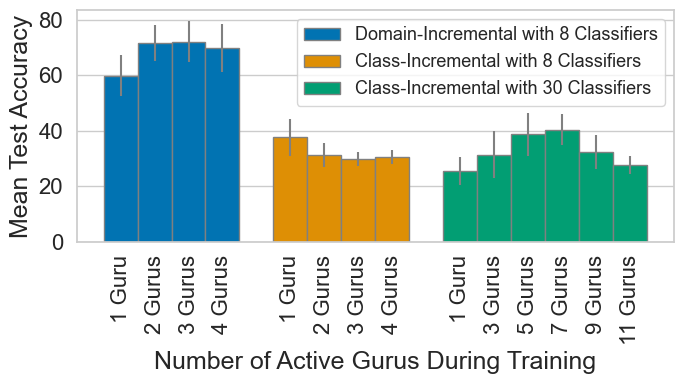

In [69]:
# A bar chart with three sets of bars. Each set should be in a different color
# The x-axis should have the following labels: "1 Guru", "2 Gurus", "3 Gurus", "4 Gurus" for the first group,
# "1 Guru", "2 Gurus", "3 Gurus", "4 Gurus" for the second group, and "1 Guru", "3 Gurus", "5 Gurus", "7 Gurus", "9 Gurus", "11 Gurus" for the third group
# The first group is for Domain-Incremental, the second group is for Class-Incremental, and the third group is for Class-Incremental with Many Classifiers

# The y-axis should be the mean accuracy: DI_one_guru_mean, DI_two_guru_mean, DI_three_guru_mean, DI_four_guru_mean for the first group, one_guru_mean, two_guru_mean, three_guru_mean, four_guru_mean for the second group, and many_v_one_guru_mean, many_v_three_guru_mean, many_v_five_guru_mean, many_v_seven_guru_mean, many_v_nine_guru_mean, many_v_eleven_guru_mean for the third group
# The error bars should be the standard deviation: DI_one_guru_std, DI_two_guru_std, DI_three_guru_std, DI_four_guru_std for the first group, one_guru_std, two_guru_std, three_guru_std, four_guru_std for the second group, and many_v_one_guru_std, many_v_three_guru_std, many_v_five_guru_std, many_v_seven_guru_std, many_v_nine_guru_std, many_v_eleven_guru_std for the third group
import seaborn as sns
#set the style to seaborn
sns.set(style="whitegrid")
# use colorblind friendly colors
sns.set_palette("colorblind")
# set the colors


plt.figure(figsize=(7, 4))
barWidth = 1

bars1 = [DI_one_guru_mean, DI_two_guru_mean, DI_three_guru_mean, DI_four_guru_mean]
bars2 = [CI_one_guru_mean, CI_two_guru_mean, CI_three_guru_mean, CI_four_guru_mean]
bars3 = [
    MV_CI_one_guru_mean,
    MV_CI_three_guru_mean,
    MV_CI_five_guru_mean,
    MV_CI_seven_guru_mean,
    MV_CI_nine_guru_mean,
    MV_CI_eleven_guru_mean,
]

stds1 = [DI_one_guru_std, DI_two_guru_std, DI_three_guru_std, DI_four_guru_std]
stds2 = [CI_one_guru_std, CI_two_guru_std, CI_three_guru_std, CI_four_guru_std]
stds3 = [
    MV_CI_one_guru_std,
    MV_CI_three_guru_std,
    MV_CI_five_guru_std,
    MV_CI_seven_guru_std,
    MV_CI_nine_guru_std,
    MV_CI_eleven_guru_std,
]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + len(bars1) + 1 for x in range(len(bars2))]
r3 = [x + len(bars1) + len(bars2) + 2 for x in range(len(bars3))]

total_bars = len(bars1) + len(bars2) + len(bars3)

# Make the plot
plt.bar(
    r1,
    bars1,
    # color="b",
    width=barWidth,
    edgecolor="grey",
    label="Domain-Incremental with 8 Classifiers",
    yerr=stds1,
    ecolor="grey",
)
plt.bar(
    r2,
    bars2,
    # color="r",
    width=barWidth,
    edgecolor="grey",
    label="Class-Incremental with 8 Classifiers",
    yerr=stds2,
    ecolor="grey",
)
plt.bar(
    r3,
    bars3,
    # color="g",
    width=barWidth,
    edgecolor="grey",
    label="Class-Incremental with 30 Classifiers",
    yerr=stds3,
    ecolor="grey",
)

# Create names on the x-axis. One name for each bar in the first group, two names for each bar in the second group, and one name for each bar in the third group
names = [
    "1 Guru",
    "2 Gurus",
    "3 Gurus",
    "4 Gurus",
    "",
    "1 Guru",
    "2 Gurus",
    "3 Gurus",
    "4 Gurus",
    "",
    "1 Guru",
    "3 Gurus",
    "5 Gurus",
    "7 Gurus",
    "9 Gurus",
    "11 Gurus",
]
x_tick_locations = np.arange(total_bars + 2)
plt.xticks(x_tick_locations, names, rotation=90)

# remove vertical grid lines
plt.grid(axis="x")


# increase font size of x labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# increase the font size of the labels on the x-axis
plt.xlabel("Number of Active Gurus During Training", fontsize=18)
plt.ylabel("Mean Test Accuracy", fontsize=18)

# increase font size of legend
plt.legend(fontsize=13, loc="upper right")
# plt.ylim(0.2, 0.7)

plt.tight_layout()
plt.show()